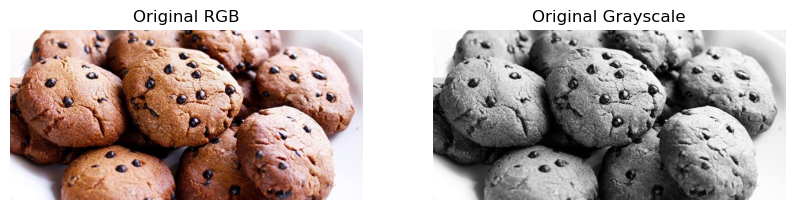

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

original_rgb = cv2.imread('data/original.jpg')
original_rgb = cv2.cvtColor(original_rgb, cv2.COLOR_BGR2RGB)  
original_gray = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2GRAY)  

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original RGB")
plt.imshow(original_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Original Grayscale")
plt.imshow(original_gray, cmap='gray')
plt.axis('off')
plt.show()


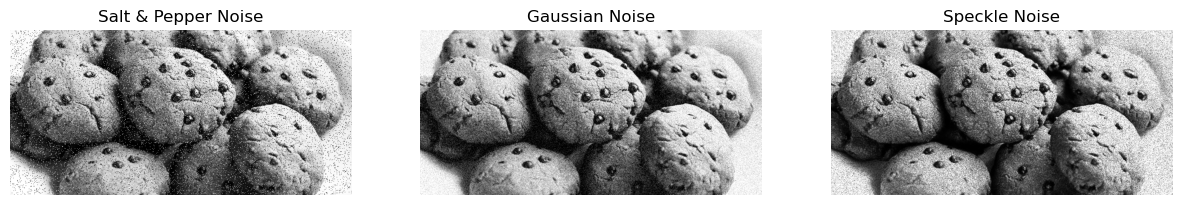

In [2]:
def add_salt_and_pepper_noise(image, prob):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = int(prob * total_pixels / 2)
    num_pepper = int(prob * total_pixels / 2)

    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

def add_gaussian_noise(image, mean, sigma):
    gaussian = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

def add_speckle_noise(image, sigma):
    speckle = np.random.normal(0, sigma, image.shape)
    noisy_image = image + image * speckle
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image


salt_pepper_noise = add_salt_and_pepper_noise(original_gray, prob=0.1)
gaussian_noise = add_gaussian_noise(original_gray, mean=0, sigma=25)
speckle_noise = add_speckle_noise(original_gray, sigma=0.25)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Salt & Pepper Noise")
plt.imshow(salt_pepper_noise, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Gaussian Noise")
plt.imshow(gaussian_noise, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Speckle Noise")
plt.imshow(speckle_noise, cmap='gray')
plt.axis('off')
plt.show()

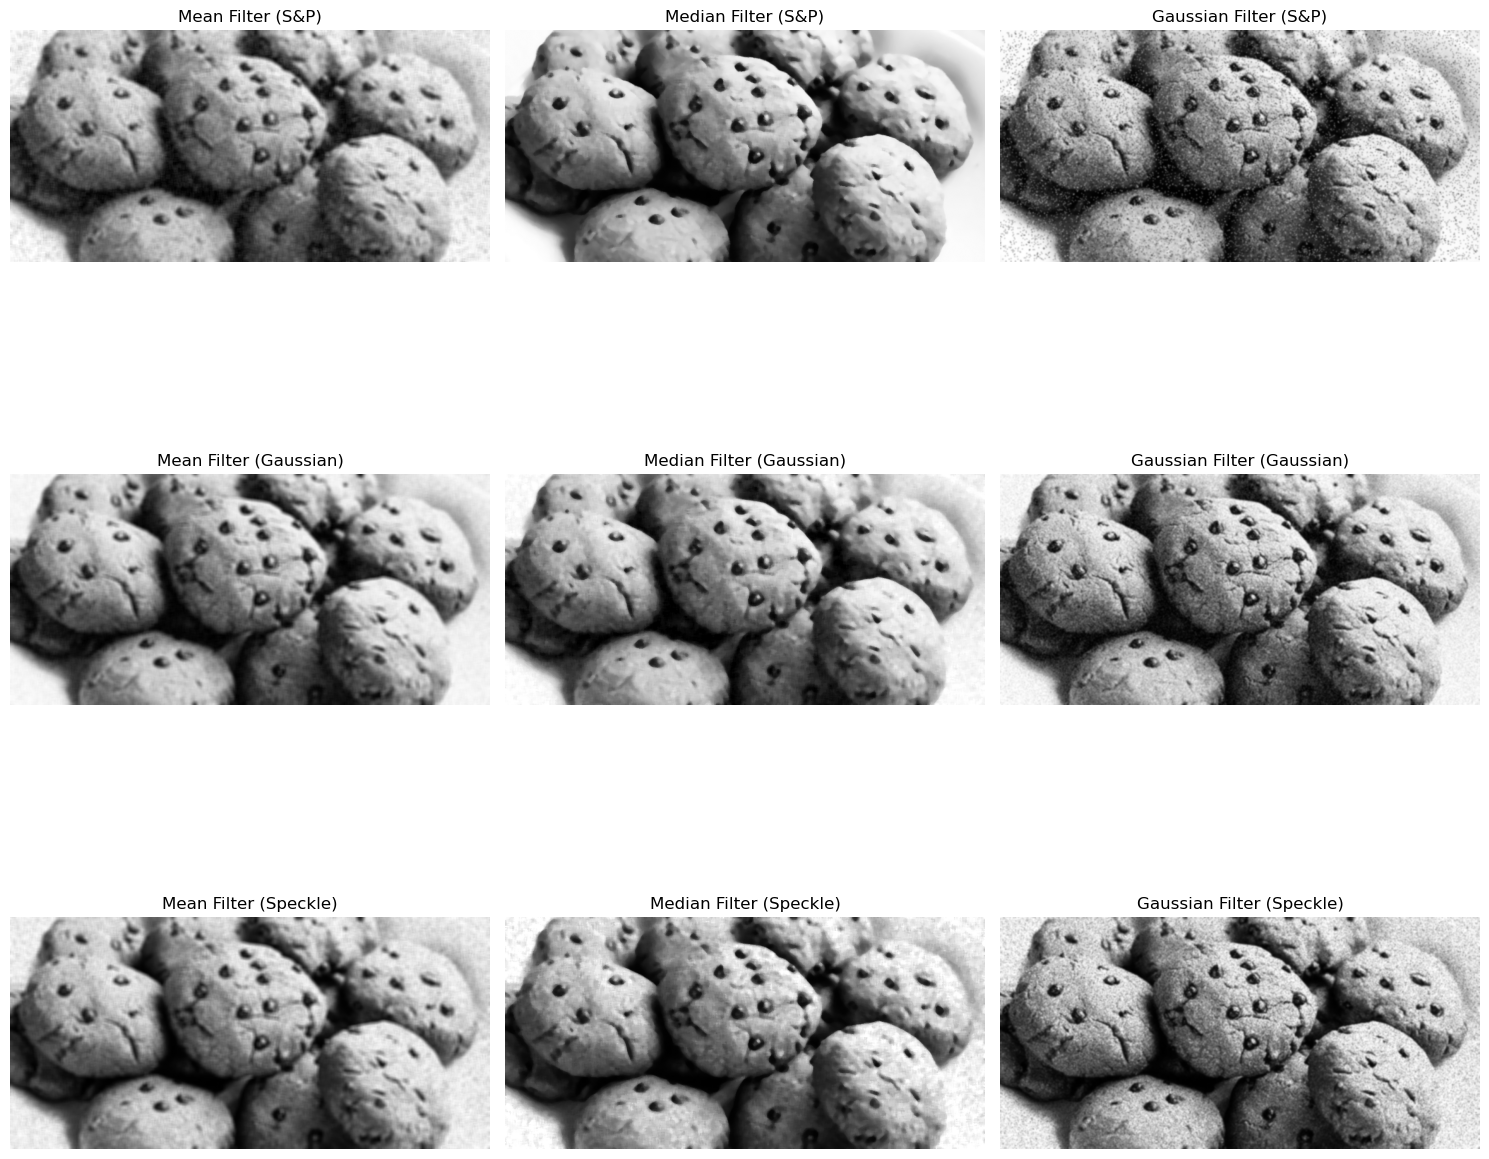

In [3]:
kernel_size = 7

mean_filtered_sp = cv2.blur(salt_pepper_noise, (kernel_size, kernel_size))
median_filtered_sp = cv2.medianBlur(salt_pepper_noise, kernel_size)
gaussian_filtered_sp = cv2.GaussianBlur(salt_pepper_noise, (kernel_size, kernel_size), sigmaX=1.0)

mean_filtered_gaussian = cv2.blur(gaussian_noise, (kernel_size, kernel_size))
median_filtered_gaussian = cv2.medianBlur(gaussian_noise, kernel_size)
gaussian_filtered_gaussian = cv2.GaussianBlur(gaussian_noise, (kernel_size, kernel_size), sigmaX=1.0)

mean_filtered_speckle = cv2.blur(speckle_noise, (kernel_size, kernel_size))
median_filtered_speckle = cv2.medianBlur(speckle_noise, kernel_size)
gaussian_filtered_speckle = cv2.GaussianBlur(speckle_noise, (kernel_size, kernel_size), sigmaX=1.0)

plt.figure(figsize=(15, 15))

# Salt & Pepper Noise
plt.subplot(3, 3, 1)
plt.title("Mean Filter (S&P)")
plt.imshow(mean_filtered_sp, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title("Median Filter (S&P)")
plt.imshow(median_filtered_sp, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title("Gaussian Filter (S&P)")
plt.imshow(gaussian_filtered_sp, cmap='gray')
plt.axis('off')

# Gaussian Noise
plt.subplot(3, 3, 4)
plt.title("Mean Filter (Gaussian)")
plt.imshow(mean_filtered_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title("Median Filter (Gaussian)")
plt.imshow(median_filtered_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title("Gaussian Filter (Gaussian)")
plt.imshow(gaussian_filtered_gaussian, cmap='gray')
plt.axis('off')

# Speckle Noise
plt.subplot(3, 3, 7)
plt.title("Mean Filter (Speckle)")
plt.imshow(mean_filtered_speckle, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.title("Median Filter (Speckle)")
plt.imshow(median_filtered_speckle, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.title("Gaussian Filter (Speckle)")
plt.imshow(gaussian_filtered_speckle, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
ssim_sp_mean = ssim(original_gray, mean_filtered_sp)
ssim_sp_median = ssim(original_gray, median_filtered_sp)
ssim_sp_gaussian = ssim(original_gray, gaussian_filtered_sp)

ssim_gaussian_mean = ssim(original_gray, mean_filtered_gaussian)
ssim_gaussian_median = ssim(original_gray, median_filtered_gaussian)
ssim_gaussian_gaussian = ssim(original_gray, gaussian_filtered_gaussian)

ssim_speckle_mean = ssim(original_gray, mean_filtered_speckle)
ssim_speckle_median = ssim(original_gray, median_filtered_speckle)
ssim_speckle_gaussian = ssim(original_gray, gaussian_filtered_speckle)

print("SSIM for Salt & Pepper Noise:")
print(f"Mean Filter: {ssim_sp_mean:.4f}")
print(f"Median Filter: {ssim_sp_median:.4f}")
print(f"Gaussian Filter: {ssim_sp_gaussian:.4f}")

print("\nSSIM for Gaussian Noise:")
print(f"Mean Filter: {ssim_gaussian_mean:.4f}")
print(f"Median Filter: {ssim_gaussian_median:.4f}")
print(f"Gaussian Filter: {ssim_gaussian_gaussian:.4f}")

print("\nSSIM for Speckle Noise:")
print(f"Mean Filter: {ssim_speckle_mean:.4f}")
print(f"Median Filter: {ssim_speckle_median:.4f}")
print(f"Gaussian Filter: {ssim_speckle_gaussian:.4f}")

print("\nBest filter for Salt & Pepper Noise:")
if ssim_sp_mean > ssim_sp_median and ssim_sp_mean > ssim_sp_gaussian:
    print("Mean filter is best.")
elif ssim_sp_median > ssim_sp_mean and ssim_sp_median > ssim_sp_gaussian:
    print("Median filter is best.")
else:
    print("Gaussian filter is best.")

print("\nBest filter for Gaussian Noise:")
if ssim_gaussian_mean > ssim_gaussian_median and ssim_gaussian_mean > ssim_gaussian_gaussian:
    print("Mean filter is best.")
elif ssim_gaussian_median > ssim_gaussian_mean and ssim_gaussian_median > ssim_gaussian_gaussian:
    print("Median filter is best.")
else:
    print("Gaussian filter is best.")

print("\nBest filter for Speckle Noise:")
if ssim_speckle_mean > ssim_speckle_median and ssim_speckle_mean > ssim_speckle_gaussian:
    print("Mean filter is best.")
elif ssim_speckle_median > ssim_speckle_mean and ssim_speckle_median > ssim_speckle_gaussian:
    print("Median filter is best.")
else:
    print("Gaussian filter is best.")

SSIM for Salt & Pepper Noise:
Mean Filter: 0.5463
Median Filter: 0.6876
Gaussian Filter: 0.6011

SSIM for Gaussian Noise:
Mean Filter: 0.6176
Median Filter: 0.6296
Gaussian Filter: 0.7776

SSIM for Speckle Noise:
Mean Filter: 0.5977
Median Filter: 0.5913
Gaussian Filter: 0.7102

Best filter for Salt & Pepper Noise:
Median filter is best.

Best filter for Gaussian Noise:
Gaussian filter is best.

Best filter for Speckle Noise:
Gaussian filter is best.
